<h2> Welcome to MARK5826 Assignment 1!</h2>

<h3> Thanks for taking this first time ever offered course! I hope you'll love it! </h3>

Lecturer In Charge: Junbum Kwon;Teaching Assistant: Daniel Han-Chen

<h2>ASSIGNMENT 1</h2>

**This assignment is worth 7 marks out of a total of 20 marks for assignments. (Ass2 is 13 marks).**

The stuff you learnt in week 1 and week 2 will be enough to complete Assignment 1 entirely.

It's due in 2 weeks time on Saturday week 4 10pm. We need you to submit a URL / LINK to your assignment notebook on Kaggle.

IT MUST BE **PUBLIC**. Also, download the Kaggle file, and upload it to Moodle by 10pm Saturday week 4.

Helper functions will be provided. It's a cut down version of the massive code we used in week 1 and onwards.

Just a note. **Assignment 1 will be used as a scaling factor for the Group Assignment. The method for scaling will be discussed once the group assingmenThis is to counteract students who do not contribute in group assignments.**

<h1> To run a cell press CTRL+ENTER </h1>

 <h1> DUE: Saturday Week 5 - 10pm via Microsoft Teams  | Worth 7 marks (so 7% of final course mark)</h1>


<h2>PROCEDURE</h2>

(You can click the links below)

1.[The Data and Task Description and Aims](#Content)

2.[Submission Procedure and Plagarism](#Submit)

[<h1>3. HELPER CODE --> MUST RUN (CTRL + ENTER)</h1>](#Help)

4.[Question 1 (0.5mark)](#Q1)

5.[Question 2 (0.5mark)](#Q2)

6.[Question 3 (1mark)](#Q3)

7.[Question 4 (1mark)](#Q4)

8.[Question 5 (1mark)](#Q5)

9.[Question 6 (1mark)](#Q6)

10.[Question 7 (2mark)](#Q7)

11.[Submission](#Sub)


<a id='Content'></a>
<h1> 1. The Data and Task Description and Aims </h1>

We are using **Ramen (Instant Noodles) Reviews**.

This assignment has 7 Questions. Each is worth different marks each. You must get all 7 Questions correct to get full marks.

Reading in the data is already done for you, so no need to do that.

You can use **ANY CODE. BUT --> NO NEW PACKAGES can be used (only pandas, numpy, seaborn, matplotlib, os, re).** In other words --> **there should be no IMPORT statement in your code.**

<a id='Submit'></a>
<h1> 2. Submission Procedure and Plagarism </h1>

**Plagarism** or copying from other students or mates is not allowed.

You can ask your friends for advice, but they must not do your assignment. If you have questions, please talk to me.

In order to **counteract cheating**, I have made ALL datasets DIFFERENT fro each of you. The **ramen** data will NOT be the same, so outputs will look **different** from each other.

<a id='Help'></a>
<h1> 3. HELPER CODE --> MUST RUN (CTRL + ENTER) </h1>

**The below code MUST be run for this notebook to work. Do not change below, as in marking, I'm going to use the original code I gave you.**

<h1> After running the code below, SKIP to QUESTION 1: </h1>

[<h1>Question 1 (0.5mark)</h1>](#Q1)

In [59]:
import pandas as pd, numpy as np, os, gc, matplotlib.pyplot as plt, seaborn as sb, re, warnings, calendar, sys
from numpy import arange
%matplotlib inline
warnings.filterwarnings('ignore'); np.set_printoptions(suppress=True); pd.options.mode.chained_assignment = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
global directory; directory = '../input'

def files(): return os.listdir(directory)

def read_clean(data):
    data.columns = [str(x.lower().strip().replace(' ','_')) for x in data.columns]
    seen = {}; columns = []; i = 0
    for i,x in enumerate(data.columns):
        if x in seen: columns.append(x+'_{}'.format(i))
        else: columns.append(x)
        seen[x] = None
        
    for x in data.columns[data.count()/len(data) < 0.0001]: del data[x];
    gc.collect();
    try: data = data.replace({'':np.nan,' ':np.nan});
    except: pass;
    
    if len(data) < 10000: l = len(data);
    else: l = 10000;
    sample = data.sample(l);size = len(sample);
    
    for x in sample.columns:
        ints = pd.to_numeric(sample[x], downcast = 'integer', errors = 'coerce')
        if ints.count()/size > 0.97:
            minimum = ints.min()
            if minimum > 0: data[x] = pd.to_numeric(data[x], downcast = 'unsigned', errors = 'coerce')
            else: data[x] = pd.to_numeric(data[x], downcast = 'integer', errors = 'coerce')
        else:
            floats = pd.to_numeric(sample[x], downcast = 'float', errors = 'coerce')
            if floats.count()/size > 0.97: data[x] = pd.to_numeric(data[x], downcast = 'float', errors = 'coerce')
            else:
                dates = pd.to_datetime(sample[x], errors = 'coerce')
                if dates.count()/size > 0.97: data[x] = pd.to_datetime(data[x], errors = 'coerce')
    return data.reset_index(drop = True)

def read(x):
    '''Kaggle Reading in CSV files.
    Just type read('file.csv'), and you'll get back a Table.'''
    
    file = '{}/{}'.format(directory,x)
    try:     data = pd.read_csv(file)
    except:  data = pd.read_csv(file, encoding = 'latin-1')
    return read_clean(data)

data = read('ramen-ratings.csv').sample(1000)

def tally(column, minimum = 0, top = None, graph = False, percent = False, multiple = False, lowercase = False, min_count = 1):
    '''Provides a tally count of all values in a COLUMN.
        1. minimum  =  (>0)          Least count of item to show.
        2. top      =  (-1,>0)       Only show top N objects
        3. graph    =  (False,True)  Show bar graph of results
        4. percent  =  (False,>0)    Instead of showing counts, show percentages of total count
        
       multiple = False/True.
       If True, counts and tallies objects in list of lists (Count Vectorizer)
       
       lowercase = True / False.
       If True, lowers all text firsrt. So A == a
       
       min_count >= 1
       If a column sum for tag has less than min_count, discard whole column
    '''
    if multiple == False:
        counts = column.value_counts().astype('uint')
        counts = counts[counts >= minimum][:top]
        counts = pd.DataFrame(counts).reset_index()
        counts.columns = [column.name, 'tally']
        if percent: 
            counts['tally'] /= counts['tally'].sum()/100
            counts['tally'] = counts['tally']
        if graph:
            C = counts[::-1]
            C.plot.barh(x = column.name, y = 'tally', legend = False); plt.show();
        return counts
    else:
        from sklearn.feature_extraction.text import CountVectorizer
        if type(column.iloc[0]) != list: column = column.apply(lambda x: [x])
        counter = CountVectorizer(lowercase = lowercase, tokenizer = lambda x: x, dtype = np.uint32, min_df = min_count)
        counter.fit(column)
        counts = pd.DataFrame(counter.transform(column).toarray())
        counts.columns = [column.name+'_('+str(x)+')' for x in counter.get_feature_names()]
        return counts
    
    
def describe(data):
    '''Provides an overview of your data
        1. dtype    =  Column type
        2. missing% =  % of the column that is missing
        3. nunique  =  Number of unique values in column
        4. top3     =  Top 3 most occuring items
        5. min      =  Minimum value. If not a number column, then empty
        6. mean     =  Average value. If not a number column, then empty
        7. median   =  Middle value. So sort all numbers, and get middle. If not a number column, then empty
        8. max      =  Maximum value. If not a number column, then empty
        9. sample   =  Random 2 elements
        10. name    =  Column Name
    '''
    dtypes = dtype(data)
    length = len(data)
    missing = ((length - data.count())/length*100)
    
    N = [];    most3 = []
    for dt,col in zip(dtypes,data.columns):
        if dt != 'datetime':
            U = data[col].value_counts()
            N.append(len(U))
            if U.values[0] > 1: most3.append(U.index[:3].tolist())
            else: most3.append([]);
        else: N.append(0); most3.append([]);
            
    df = pd.concat([dtypes, missing], 1)
    df.columns = ['dtype','missing%']
    df['nunique'] = N; df['top3'] = most3
    
    numbers = list(data.columns[df['dtype'].isin(('uint','int','float'))])
    df['min'] = data.min()
    df['mean'] = data[numbers].mean()
    df['median'] = data[numbers].median()
    df['max'] = data.max()
    df['sample'] = data.apply(lambda x : x.sample(2).values.tolist())
    df['name'] = list(data.columns)
    return df.sort_values(['missing%', 'nunique', 'dtype'], ascending = [False, False, True]).reset_index(drop = True)


def Checker(x):
    if type(x) is pd.DataFrame: return 0
    elif type(x) is pd.Series: return 1
    else: return -1

def columns(data): return list(data.columns)
def rows(data): return list(data.index)
def index(data): return list(data.index)
def head(data, n = 10): return data.head(n)
def tail(data, n = 10): return data.tail(n)
def sample(data, n = 10): return data.sample(n)

def dtype(data):
    what = Checker(data)
    if what == 0:
        dtypes = data.dtypes.astype('str')
        dtypes = dtypes.str.split(r'\d').str[0]
    else:
        dtypes = str(data.dtypes)
        dtypes = re.split(r'\d', dtypes)[0]
    return dtypes

def mean(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        return data[numbers].mean()
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt: return data.mean()
        else: return np.nan
    else:
        try:     return np.nanmean(data)
        except:  return np.nan
        
def std(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        return data[numbers].std()
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt: return data.std()
        else: return np.nan
    else:
        try:     return np.nanstd(data)
        except:  return np.nan
        
def var(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        return data[numbers].var()
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt: return data.var()
        else: return np.nan
    else:
        try:     return np.nanvar(data)
        except:  return np.nan
        
def log(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        x = np.log(data[numbers])
        x[np.isinf(x)] = np.nan
        return pd.Series(x)
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt:
            x = np.log(data)
            x[np.isinf(x)] = np.nan
            return x
        else: return np.nan
    else:
        try:
            x = np.log(data)
            x[np.isinf(x)] = np.nan
            return x
        except:  return np.nan
        
def median(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        return data[numbers].median()
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt: return data.median()
        else: return np.nan
    else:
        try:     return np.nanmedian(data)
        except:  return np.nan
        
def minimum(data):
    what = Checker(data)
    if what == 0:      return data.min()
    elif what == 1:    return data.min()
    else:              return np.min(data)
        
def maximum(data):
    what = Checker(data)
    if what == 0:      return data.max()
    elif what == 1:    return data.max()
    else:              return np.max(data)
    
def missing(data):
    what = Checker(data)
    if what >= 0:      return pd.isnull(data)
    else:              return np.isnan(data)
    
def count(data):
    what = Checker(data)
    if what >= 0:      return data.count()
    else:              return len(data)
    
def nunique(data):
    what = Checker(data)
    if what >= 0:      return data.nunique()
    else:              return len(np.unique(data))
    
def unique(data):
    if type(data) is pd.DataFrame:
        uniques = []
        for x in data.columns:
            uniques.append(data[x].unique())
        df = pd.Series(uniques)
        df.index = data.columns
        return df
    elif type(data) is pd.Series: return data.unique()
    else:              return np.unique(data)
    
def total(data):
    what = Checker(data)
    _dt = ('uint','int','float')
    if what == 0:
        dtypes = dtype(data)
        numbers = data.columns[dtypes.isin(_dt)]
        return data[numbers].sum()
    elif what == 1:
        dtypes = dtype(data)
        if dtypes in _dt: return data.sum()
        else: return np.nan
    else:
        try:     return np.nansum(data)
        except:  return np.nan

def hcat(*columns):
    cols = []
    for c in columns:
        if c is None: continue;
        if type(c) in (list, tuple): 
            for i in c:
                if type(i) not in (pd.DataFrame, pd.Series): cols.append(pd.Series(i))
                else: cols.append(i)
        elif type(c) not in (pd.DataFrame, pd.Series): cols.append(pd.Series(c))
        else: cols.append(c)
    return pd.concat(cols, 1)

def vcat(*columns):
    cols = []
    for c in columns:
        if c is None: continue;
        if type(c) in (list, tuple): 
            for i in c:
                if type(i) not in (pd.DataFrame, pd.Series): cols.append(pd.Series(i))
                else: cols.append(i)
        elif type(c) not in (pd.DataFrame, pd.Series): cols.append(pd.Series(c))
        else: cols.append(c)
    return pd.concat(cols, 0)
    
def tabulate(*columns, method = 'count'):
    '''Splits columns into chunks, and counts the occurences in each group.
        Remember - tabulate works on the LAST column passed.
        Options:
            1. count            = Pure Count in group
            2. count_percent    = Percentage of Count in group
            3. mean             = Mean in group
            4. median           = Median in group
            5. max              = Max in group
            6. min              = Min in group
            7. sum_percent      = Percentage of Sum in group
        Eg:
            Apple | 1
            ---------
            Orange| 3
            ---------
            Apple | 2
            ---------
        Becomes:
            Apple | 1 | 1
            -------------
                  | 2 | 1
            -------------
            Orange| 3 | 1
        
        NOTE --------
            method can be a list of multiple options.
    '''
    if type(method) in (list, tuple):
        xs = []
        for x in method:
            g = tabulate(*columns, method = x)
            xs.append(g)
        xs = hcat(xs)
        xs = xs.T.drop_duplicates().T
        return read_clean(xs)        
    else:
        def percent(series):
            counts = series.count()
            return counts.sum()

        data = hcat(*columns)
        columns = data.columns.tolist()

        if method in ('count', 'count_percent'):
            groups = data.groupby(data.columns.tolist()).apply(lambda x: x[data.columns[-1]].count())

            if method == 'count_percent':
                groups = groups.reset_index()
                groups.columns = list(groups.columns[:-1])+['Group_Count']
                right = data.groupby(columns[:-1]).count().reset_index()
                right.columns = list(right.columns[:-1])+['Group_Sum']

                groups = pd.merge(left = groups, right = right, left_on = columns[:-1], right_on = columns[:-1])
                groups['Percent%'] = groups['Group_Count']/groups['Group_Sum']*100
                groups = groups[columns+['Percent%']]
                return groups

        elif method == 'mean': groups = data.groupby(data.columns.tolist()[:-1]).apply(lambda x: x[data.columns[-1]].mean())
        elif method == 'median': groups = data.groupby(data.columns.tolist()[:-1]).apply(lambda x: x[data.columns[-1]].median())
        elif method == 'max': groups = data.groupby(data.columns.tolist()[:-1]).apply(lambda x: x[data.columns[-1]].max())
        elif method == 'min': groups = data.groupby(data.columns.tolist()[:-1]).apply(lambda x: x[data.columns[-1]].min())
        elif method == 'sum_percent':
            groups = data.groupby(data.columns.tolist()[:-1]).apply(lambda x: x[data.columns[-1]].sum()).reset_index()
            groups.columns = list(groups.columns[:-1])+['Group_Count']
            right = data.groupby(columns[:-1]).sum().reset_index()
            right.columns = list(right.columns[:-1])+['Group_Sum']

            groups = pd.merge(left = groups, right = right, left_on = columns[:-1], right_on = columns[:-1])
            groups['Sum%'] = groups['Group_Count']/groups['Group_Sum']*100
            groups = groups[cols+['Sum%']]
            return groups
        else:
            print('Method does not exist. Please choose count, count_percent, mean, median, max, min, sum_percent.'); return None;
        #except: print('Method = {}'.format(method)+' cannot work on Object, Non-Numerical data. Choose count.'); return None;

        groups = pd.DataFrame(groups)
        groups.columns = [method]
        groups.reset_index(inplace = True)
        return groups


def sort(data, by = None, how = 'ascending', inplace = False):
    ''' how can be 'ascending' or 'descending' or 'a' or 'd'
    It can also be a list for each sorted column.
    '''
    replacer = {'ascending':True,'a':True,'descending':False,'d':False}
    if by is None and type(data) is pd.Series:
        try:    x = replacer[how]
        except: print("how can be 'ascending' or 'descending' or 'a' or 'd'"); return None;
        return data.sort_values(ascending = x, inplace = inplace)
    elif type(how) is not list:
        try:    how = replacer[how]
        except: print("how can be 'ascending' or 'descending' or 'a' or 'd'"); return None;
    else:
        for x in how: 
            try:    x = replacer[x]
            except: print("how can be 'ascending' or 'descending' or 'a' or 'd'"); return None;
    return data.sort_values(by, ascending = how, inplace = inplace)

def keep(data, what, inplace = False):
    '''Keeps data in a column if it's wanted.
    Everything else is filled with NANs'''
    if type(what) not in (list,tuple,np.array,np.ndarray): what = [what]
    need = data.isin(what)
    if inplace: 
        df = data
        df.loc[~need] = np.nan
    else: 
        df = data.copy()
        df.loc[~need] = np.nan
        return df

def remove(data, what, inplace = False):
    '''Deletes data in a column if it's not wanted.
    Everything else is filled with NANs'''
    if type(what) not in (list,tuple): what = [what]
    need = data.isin(what)
    if inplace: 
        df = data
        df.loc[need] = np.nan
    else: 
        df = data.copy()
        df.loc[need] = np.nan
        return df
    
    
def ternary(data, condition, true, false = np.nan, inplace = False):
    '''C style ternary operator on column.
    Condition executes on column, and if true, is filled with some value.
    If false, then replaced with other value. Default false is NAN.'''
    try:
        execute = 'data {}'.format(condition)
        series = eval(execute)
        try: series = series.map({True:true, False:false})
        except: series = series.replace({True:true, False:false})
        return series
    except: print('Ternary accepts conditions where strings must be enclosed.\nSo == USD not allowed. == "USD" allowed.'); return False;

    
def locate(data, column):
    '''Use ternary to get result and then filter with notnull'''
    if dtype(column) == 'bool': return data.loc[column]
    return data.loc[column.notnull()]
    
def query(data, column = None, condition = None):
    '''Querying data based on conditions'''
    def Q(data, column, condition):
        if column is not None:
            if type(condition) in (np.array, np.ndarray, list, tuple, set):
                cond = keep(data[column], tuple(condition))
                cond = (cond.notnull())
            else: cond = ternary(data[column], condition, True, False)
            return data.loc[cond]
        else:
            if type(condition) in (np.array, np.ndarray, list, tuple, set):
                cond = keep(data, tuple(condition))
            else: cond = ternary(data, condition, True, False)
            return data.loc[cond]
    try:
        return Q(data, column, condition)
    except:
        condition = condition.replace('=','==')
        return Q(data, column, condition)
        
def keep_top(x, n = 5):
    '''Keeps top n (after tallying) in a column'''
    df = keep(x, tally(x)[x.name][:n].values)
    return df

def keep_bot(x, n = 5):
    '''Keeps bottom n (after tallying) in a column'''
    df = keep(x, tally(x)[x.name][:-n].values)
    return df
    
    
def plot(x, y = None, colour = None, column = None, data = None, size = 5, top = 10, wrap = 4, 
         subset = 5000, method = 'mean', quantile = True, bins = 10,
         style = 'lineplot', logx = False, logy = False, logc = False, power = 1):
    '''Plotting function using seaborn and matplotlib
        Options:
        x, y, colour, column, subset, style, method
        
        Plot styles:
            1. boxplot
            2. barplot
            3. tallyplot (counting number of appearances)
            4. violinplot (boxplot just fancier)
            5. lineplot (mean line plot)
            6. histogram
            7. scatterplot (X, Y must be numeric --> dates will be converted)
            8. bivariate (X, Y must be numeric --> dates will be converted)
            9. heatmap (X, Y will be converted into categorical automatically --> bins)
            10. regplot (X, Y must be numeric --> dates will be converted)
    '''
    if type(x) in (np.array,np.ndarray): x = pd.Series(x); x.name = 'x';
    if type(y) in (np.array,np.ndarray): y = pd.Series(y); y.name = 'y';
    if type(column) in (np.array,np.ndarray): column = pd.Series(column); column.name = 'column';
    if type(colour) in (np.array,np.ndarray): colour = pd.Series(colour); colour.name = 'colour';
        
    if type(x) == pd.Series: 
        data = pd.DataFrame(x); x = x.name
        if type(x) is not str:
            data.columns = [str(x)]
            x = str(x)
    if method == 'mean': estimator = np.nanmean
    elif method == 'median': estimator = np.nanmedian
    elif method == 'min': estimator = np.min
    elif method == 'max': estimator = np.max
    else: print('Wrong method. Allowed = mean, median, min, max'); return False;
    #----------------------------------------------------------
    sb.set(rc={'figure.figsize':(size*1.75,size)})
    dtypes = {'x':None,'y':None,'c':None,'col':None}
    names = {'x':None,'y':None,'c':None,'col':None}
    xlim = None
    #----------------------------------------------------------
    if data is not None:
        if type(x) is str: x = data[x];
        if type(y) is str: y = data[y]; 
        if type(colour) is str: colour = data[colour]; 
        if type(column) is str: column = data[column]; 
    if type(x) is str: print('Please specify data.'); return False;
    #----------------------------------------------------------
    if x is not None:
        dtypes['x'] = dtype(x); names['x'] = x.name
        if dtypes['x'] == 'object': x = keep_top(x, n = top)
        elif dtypes['x'] == 'datetime': x = date_number(x)
        if logx and dtype(x) != 'object': x = log(x)
    if y is not None: 
        dtypes['y'] = dtype(y); names['y'] = y.name
        if dtypes['y'] == 'object': y = keep_top(y, n = top)
        elif dtypes['y'] == 'datetime': y = date_number(y)
        if logy and dtype(y) != 'object': y = log(y)
    if colour is not None:
        dtypes['c'] = dtype(colour); names['c'] = colour.name
        if dtypes['c'] == 'object': colour = keep_top(colour, n = top)
        elif dtypes['c'] == 'datetime': colour = date_number(colour)
        if logc and dtype(colour) != 'object': colour = log(colour)
    if column is not None:
        dtypes['col'] = dtype(column); names['col'] = column.name
        if dtypes['col'] == 'object': column = keep_top(column, n = top)
        elif dtypes['col'] == 'datetime': column = date_number(column)
    #----------------------------------------------------------
    df = hcat(x, y, colour, column)
    if subset > len(df): subset = len(df)
    df = sample(df, subset)
    #----------------------------------------------------------
    if column is not None:
        if dtype(df[names['col']]) not in ('object', 'uint',' int') and nunique(df[names['col']]) > top: 
            if quantile: df[names['col']] = cut(df[names['col']], bins = bins, method = 'quantile')
            else: df[names['col']] = cut(df[names['col']], bins = bins, method = 'range')
    
    try: df.sort_values(names['y'], inplace = True);
    except: pass;
    #----------------------------------------------------------
    replace = {'boxplot':'box', 'barplot':'bar', 'tallyplot':'count', 'violinplot':'violin', 
               'lineplot': 'point', 'histogram':'lv'}
    
    if style == 'histogram' and y is None:
        plot = sb.distplot(df[names['x']].loc[df[names['x']].notnull()], bins = bins)
    elif style == 'lineplot' and y is None:
        plot = plt.plot(df[names['x']]);
        plt.show(); return;
    elif style == 'barplot' and y is None:
        plot = df.sort_values(names['x']).plot.bar();
        plt.show(); return;
    elif style in replace.keys():
        if dtype(df[names['x']]) not in ('object', 'uint',' int') and nunique(df[names['x']]) > top: 
            if quantile: df[names['x']] = cut(df[names['x']], bins = bins, method = 'quantile')
            else: df[names['x']] = cut(df[names['x']], bins = bins, method = 'range')
        
        if names['col'] is not None:
            plot = sb.factorplot(x = names['x'], y = names['y'], hue = names['c'], data = df, kind = replace[style], col = names['col'],
                             n_boot = 1, size = size, estimator = estimator, col_wrap = wrap)
        else:
            plot = sb.factorplot(x = names['x'], y = names['y'], hue = names['c'], data = df, kind = replace[style], col = names['col'],
                             n_boot = 1, size = size, estimator = estimator)
            
        for ax in plot.axes.flatten(): 
            for tick in ax.get_xticklabels(): 
                tick.set(rotation=90)
    
    elif style == 'heatmap':
        if dtype(df[names['x']]) != 'object'and nunique(df[names['x']]) > top:
            if quantile: df[names['x']] = cut(df[names['x']], bins = bins, method = 'quantile')
            else: df[names['x']] = cut(df[names['x']], bins = bins, method = 'range')
                
        if dtype(df[names['y']]) != 'object'and nunique(df[names['y']]) > top:
            if quantile: df[names['y']] = cut(df[names['y']], bins = bins, method = 'quantile')
            else: df[names['y']] = cut(df[names['y']], bins = bins, method = 'range')     

        df = tabulate(df[names['x']], df[names['y']]).pivot(index = names['x'], columns = names['y'], values = 'count')
        plot = sb.heatmap(df, cmap="YlGnBu")

        
    elif dtype(df[names['x']]) == 'object' or dtype(df[names['y']]) == 'object':
            print('{} can only take X = number and Y = number.'.format(style)); return False;
        
    elif style  in ('regplot', 'scatterplot'):
        if column is None: col_wrap = None
        else: col_wrap = wrap
        if style == 'regplot': reg = True
        else: reg = False
        
        plot = sb.lmplot(x = names['x'], y = names['y'], hue = names['c'], data = df, col = names['col'],
                             n_boot = 2, size = size, ci = None, scatter_kws={"s": 50,'alpha':0.5},
                        col_wrap = col_wrap, truncate = True, fit_reg = reg, order = power)
        plot.set_xticklabels(rotation=90)
        
    elif style == 'bivariate':
        plot = sb.jointplot(x = names['x'], y = names['y'], data = df, dropna = True, size = size, kind = 'reg',
                           scatter_kws={"s": 50,'alpha':0.5}, space = 0)
    plt.show()

<a id='Q1'></a>
<h1> 4. Question 1 (0.5mark) </h1>

<h1> You can access the RAMEN data using data. Below, I have shown the HEAD of the data (first 5 rows) </h1>

In [60]:
head(data, 5)

,review_#,brand,variety,style,country,stars,top_ten
2293,287,Paldo,King Cup Lobster,Cup,South Korea,3.750,NaN
728,1852,Myojo,Udon Japanese Style Precooked Noodles With Sou...,Bowl,USA,3.250,NaN
2115,465,Nissin,Souper Meal Picante Shrimp Hot Spicy,Bowl,USA,2.750,NaN
1366,1214,Eat & Go,Rendang Beef Flavour Fried Instant Noodle,Cup,Indonesia,5.000,NaN
844,1736,Mamee,Monster Snek Mi Pedas,Pack,Malaysia,5.000,NaN


<h2> TASK: TALLY up how many of each STYLE is in the column STYLE. <h2>

For example, if [apple, apple, orange] --> apple = 2, orange = 1

In [61]:
# Your code goes here
tally(data['style'])

,style,tally
0,Pack,582
1,Cup,191
2,Bowl,182
3,Tray,42
4,Box,2


<a id='Q2'></a>
<h1> 5. Question 2 (0.5mark) </h1>

<h2> TASK: Plot a histogram on stars. <h2>

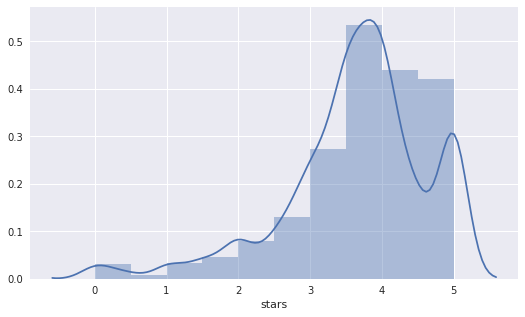

In [62]:
# Your code goes here
#help(plot)
plot(data = data,x='stars',style = 'histogram')

<a id='Q3'></a>
<h1> 6. Question 3 (1mark) </h1>
<h2> TASK: Plot a BOXPLOT where Xaxis = BRAND, Yaxis = STARS.</h2>

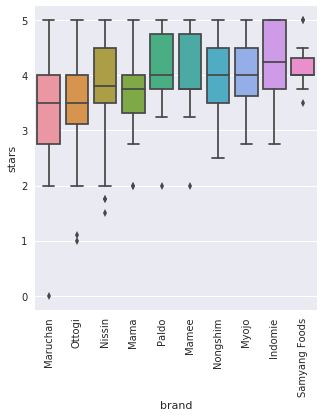

In [63]:
# Your code goes here
plot(data = data,x='brand',y='stars',style = 'boxplot')

<a id='Q4'></a>
<h1> 7. Question 4 (1mark) </h1>
<h2> TASK: Using TALLY on COUNTRY, find the PERCENT each country holds with a GRAPH set to TRUE. Show only the TOP 10 countries.</h2>

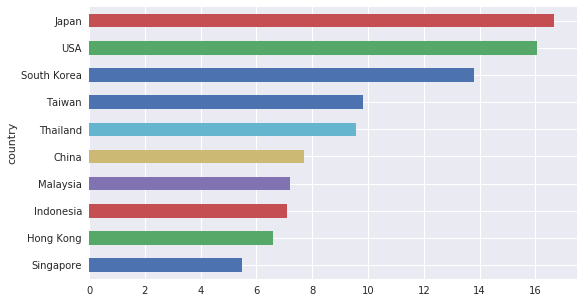

,country,tally
0,Japan,16.667
1,USA,16.045
2,South Korea,13.806
3,Taiwan,9.826
4,Thailand,9.577
5,China,7.711
6,Malaysia,7.214
7,Indonesia,7.090
8,Hong Kong,6.592
9,Singapore,5.473


In [64]:
# Your code goes here
#help(tally)
tally(data['country'],graph = True,percent = True,top = 10)


<a id='Q5'></a>
<h1> 8. Question 5 (1mark) </h1>
<h2> TASK: QUERY only BRAND = Ve Wong</h2>

In [65]:
# Your code goes here
query(data = data, column = 'brand', condition = '=="Ve Wong"')

,review_#,brand,variety,style,country,stars,top_ten
2202,378,Ve Wong,Hot Of Hots Artificial Satay Beef,Bowl,Taiwan,3.750,NaN
2132,448,Ve Wong,Kung Fu Artificial Sesame Chicken,Bowl,Taiwan,3.750,NaN
2573,7,Ve Wong,Mushroom Pork,Pack,Vietnam,1.000,NaN
2479,101,Ve Wong,Artificial Sesame Chicken,Pack,Taiwan,4.250,NaN
2538,42,Ve Wong,Kung-Fu Chicken Flavor,Pack,Vietnam,2.750,NaN
1263,1317,Ve Wong,Little Prince Brand Snack Noodles Original Flavor,Pack,Taiwan,2.500,NaN
1950,630,Ve Wong,Kung Fu Artificial Mushroom Pork,Bowl,Taiwan,1.250,NaN
2306,274,Ve Wong,Kung Fu Artificial Soybean Paste,Pack,Taiwan,4.000,NaN
250,2330,Ve Wong,Little Prince(ss) Brand Snack Noodles Artifici...,Pack,Taiwan,4.000,NaN
2477,103,Ve Wong,Vegetarian Flavor,Pack,Taiwan,3.000,NaN


<a id='Q6'></a>
<h1> 9. Question 6 (1mark) </h1>
<h2> TASK: SORT STARS by DESCENDING order. Then, show the LAST 12 rows. </h2>

In [66]:
# Your code goes here
#help(sort)
s = sort(data, by='stars', how = 'descending')
s.tail(12)

,review_#,brand,variety,style,country,stars,top_ten
2537,43,Kim Ve Wong,Jaopai Series: Vegetarian Instant Noodles,Bowl,Taiwan,0.000,NaN
53,2527,Uni-President,Mushroom Flavor,Pack,Vietnam,0.000,NaN
1209,1371,Campbell's,Hearty Noodles Thai Flavour,Cup,Canada,0.000,NaN
557,2023,Urban Noodle,Authentic Street Food Black Bean,Cup,UK,0.000,NaN
798,1782,Western Family,Beef Flavour Instant Noodles,Pack,Canada,0.000,NaN
707,1873,Vedan,Wei Wei A Instant Noodles Chicken Flavor,Bowl,Taiwan,0.000,NaN
785,1795,Azami,Kimchee Flavour Noodle Soup,Pack,Canada,0.000,NaN
2194,386,US Canning,Fu Chang Chinese Noodle Company Pork Seafood,Tray,USA,0.000,NaN
1996,584,Baijia,Single Noble Black Bone Chicken Sweet Potato T...,Cup,China,0.000,NaN
624,1956,Maruchan,Spicy Tomato Salsa Ramen,Cup,Japan,0.000,NaN


<a id='Q7'></a>
<h1> 10. Question 7 (2mark) </h1>
<h1> TASK1: QUERY only STARS > 3. Data will be used for TASK2</h2>
<h2> TASK2: Plot a LINEPLOT Xaxis = COUNTRY and Yaxis = count(STYLE) per COUNTRY and COLOUR = STYLE using TABULATE.</h2>

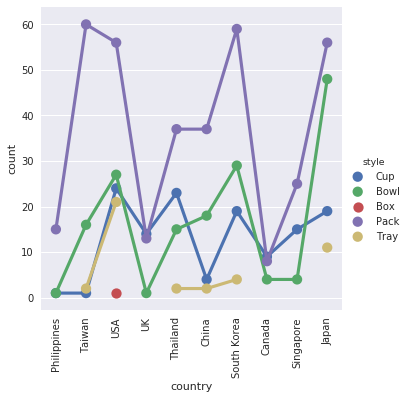

In [84]:
#Your code goes here
#help(query)
Fdata = query(data = data, column = 'stars', condition = '>3')
#Fdata
Xdata = tabulate(data['country'], data['style'], method = 'count')
#Xdata
plot(data =Xdata, x = 'country', y = Xdata['count'], style='lineplot',colour='style')




<a id='Sub'></a>
<h1> 11. SUBMISSION </h1>

Good work on finishing the Assignment!

By **Saturday week 5 10pm, you must DOWNLOAD this notebook and submit the .ipynb file to MICROSOFT TEAMS (See instructions at General->MARK5826 Wiki)**

**You need to make your notebook PUBLIC, or share it with DANIEL, JAMES or JUNBUM.**

**IF you are confused, please email us or talk to us**

####### END OF FILE